In [1]:
import ROOT
import copy
from tqdm import tqdm
%run ../../utils/helper.ipynb

Welcome to JupyROOT 6.22/06


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-33z5ce3_ because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
project_name="ana_v2"
channels = ["piplus_piminus", "piplus_pi0", "piplus_piplus","pi0_pi0","piminus_pi0", "piminus_piminus"]
cut_names = ["v3","v4","v6","v1","v7","v6"]
# channels = ["piplus_piminus", "piplus_pi0", "piplus_piplus","piminus_pi0", "piminus_piminus"]
# cut_names = ["v3","v4","v6","v7","v6"]
version = "Fall2018_RGA_inbending"

6it [00:00,  9.53it/s]
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


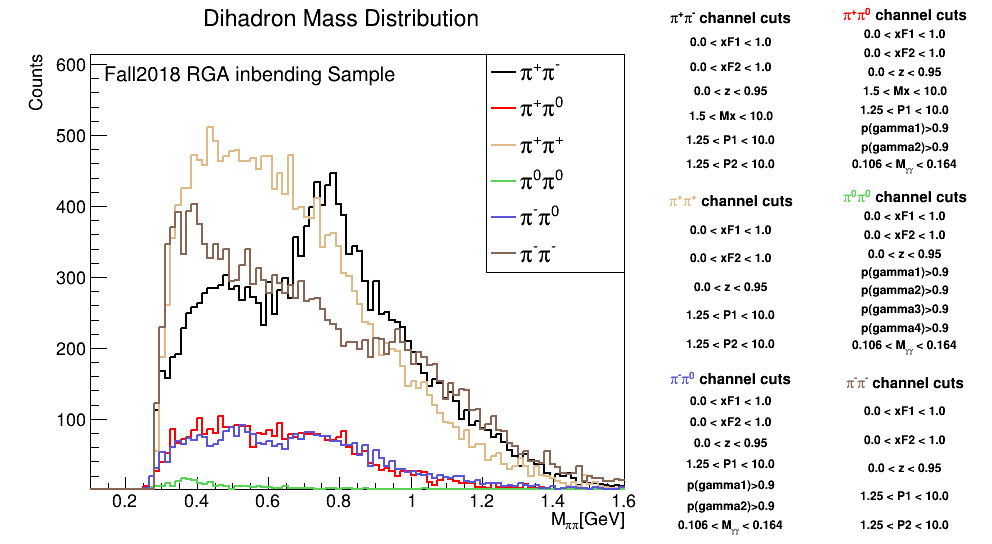

In [5]:
c=gen_Mh_dists(project_name, channels, cut_names, version,Nmax=100000,ML=True)
c.Draw()

6it [00:12,  2.15s/it]
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


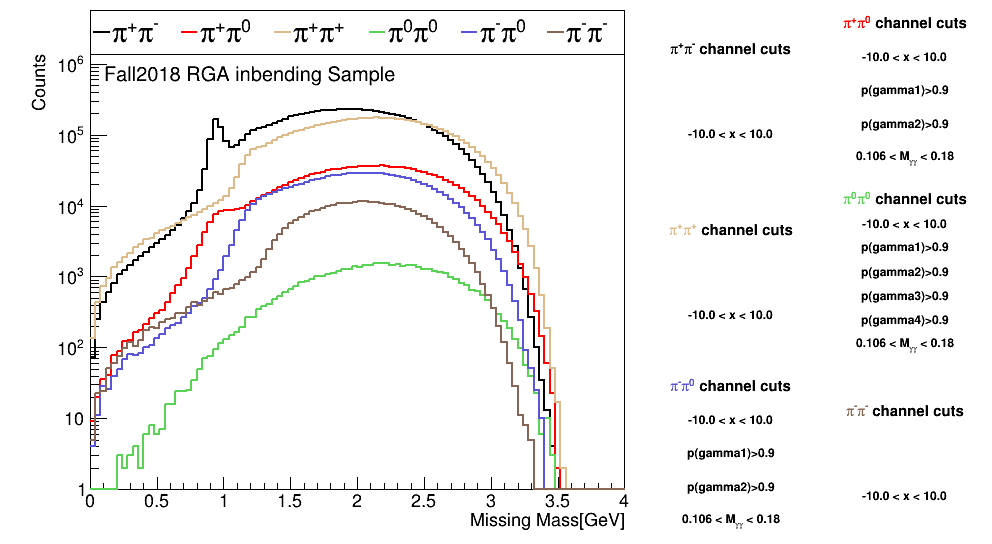

In [54]:
c=gen_Mx_dists(project_name, channels, ["v0","v0","v0","v0","v0","v0"], version,Nmax=10000000,ML=True,log_y=True)
c.Draw()

4it [03:00, 45.24s/it]
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


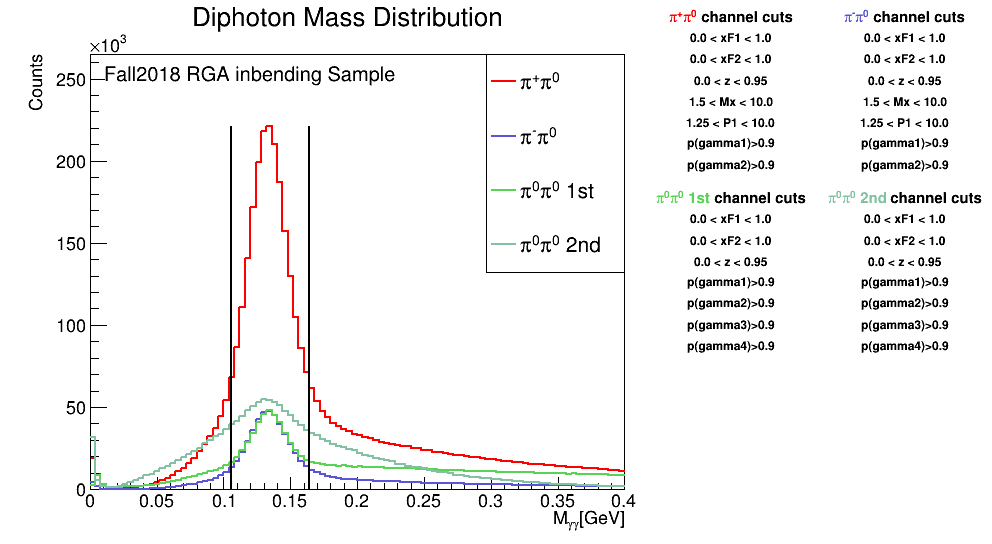

In [4]:
c=gen_Mgg_dists(project_name,version,Nmax=100000000,ML=True)
c.Draw()

# Exploring RGA inbending counts

In [9]:
import ROOT
f1=ROOT.TFile("../../projects/ana_v0/volatile/data/pi0_pi0/Fall2018_RGA_inbending_merged.root")
t1=f1.Get("dihadron")
print(t1.GetEntries())
print(t1.GetEntries("isGoodEventWithoutML==1"))
print(t1.GetEntries("p_11>0.9&&p_12>0.9&&p_21>0.9&&p_22>0.9"))

778764
15800
29997


Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3 (Potential memory leak).


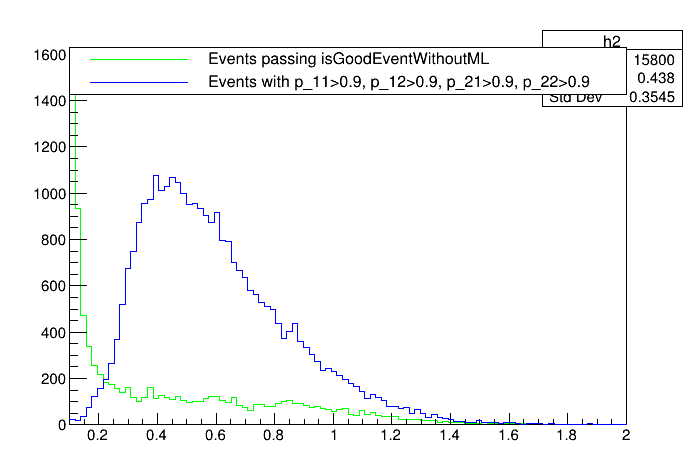

In [25]:
c=ROOT.TCanvas()
h1 = ROOT.TH1F("h1", "", 100, 0.1, 2)
h2 = ROOT.TH1F("h2", "", 100, 0.1, 2)
h3 = ROOT.TH1F("h3", "", 100, 0.1, 2)

#t1.Draw("Mh>>h1","", "")
h1.SetLineColor(ROOT.kRed)

t1.Draw("Mh>>h2","isGoodEventWithoutML==1", "")
h2.SetLineColor(ROOT.kGreen)

t1.Draw("Mh>>h3","p_11>0.9&&p_12>0.9&&p_21>0.9&&p_22>0.9", "same")
h3.SetLineColor(ROOT.kBlue)

# Create a legend
legend = ROOT.TLegend(0.1, 0.8, 0.9, 0.9)
legend.SetNColumns(1)
#legend.AddEntry(h1, "All events", "l")
legend.AddEntry(h2, "Events passing isGoodEventWithoutML", "l")
legend.AddEntry(h3, "Events with p_11>0.9, p_12>0.9, p_21>0.9, p_22>0.9", "l")
legend.Draw()


c.Draw()

In [57]:
f=ROOT.TFile("../../projects/ana_v2/volatile/data/piplus_piminus/nSidis_RGA_5036.root")
t=f.Get("dihadron")
#t.GetEntries("P1>1.25&&P2>1.25&&Mx>1.5")

7173

In [70]:
import math

f=ROOT.TFile("../../projects/ana_v2/volatile/data/piplus_pi0/nSidis_RGA_5032.root")
t=f.Get("dihadron")
print("RGA Inbending PiPlus Pi0")
print("Dihadron TTree entries:",t.GetEntries())
t=f.Get("EventTree")
dihadrons=0
for iev in t:
    pid=np.array(iev.pid)
    ngammas=np.sum(pid==22)
    npi=np.sum(pid==211)
    ndiphotons=math.comb(ngammas,2)
    ndihadrons=ndiphotons*npi
    dihadrons+=ndihadrons
print("EventTree dihadrons built:",dihadrons)

RGA Inbending PiPlus Pi0
Dihadron TTree entries: 50631
EventTree dihadrons built: 50631


In [71]:
import math
f=ROOT.TFile("../../projects/ana_v2/volatile/data/piplus_piminus/nSidis_RGA_5032.root")
t=f.Get("dihadron")
print("RGA Inbending PiPlus PiMinus")
print("Dihadron TTree entries:",t.GetEntries())
t=f.Get("EventTree")
dihadrons=0
for iev in t:
    pid=np.array(iev.pid)
    npip=np.sum(pid==211)
    npim=np.sum(pid==-211)
    ndihadrons=npip*npim
    dihadrons+=ndihadrons
print("EventTree dihadrons built:",dihadrons)

RGA Inbending PiPlus PiMinus
Dihadron TTree entries: 10638
EventTree dihadrons built: 10638


# Exploring RGA outbending counts

In [74]:
f=ROOT.TFile("../../projects/ana_v2/volatile/data/piplus_pi0/nSidis_RGA_5627.root")
t=f.Get("dihadron")
print("RGA Outbending PiPlus Pi0")
print("Dihadron TTree entries:",t.GetEntries())
t=f.Get("EventTree")
dihadrons=0
for iev in t:
    pid=np.array(iev.pid)
    ngammas=np.sum(pid==22)
    npi=np.sum(pid==211)
    ndiphotons=math.comb(ngammas,2)
    ndihadrons=ndiphotons*npi
    dihadrons+=ndihadrons
print("EventTree dihadrons built:",dihadrons)

RGA Outbending PiPlus Pi0
Dihadron TTree entries: 35616
EventTree dihadrons built: 35616


In [75]:
import math
f=ROOT.TFile("../../projects/ana_v2/volatile/data/piplus_piminus/nSidis_RGA_5627.root")
t=f.Get("dihadron")
print("RGA Outbending PiPlus PiMinus")
print("Dihadron TTree entries:",t.GetEntries())
t=f.Get("EventTree")
dihadrons=0
for iev in t:
    pid=np.array(iev.pid)
    npip=np.sum(pid==211)
    npim=np.sum(pid==-211)
    ndihadrons=npip*npim
    dihadrons+=ndihadrons
print("EventTree dihadrons built:",dihadrons)

RGA Outbending PiPlus PiMinus
Dihadron TTree entries: 16131
EventTree dihadrons built: 16131


In [79]:
(pid>10) * (pid<30)

array([ True, False, False, False, False,  True,  True])